In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("xy_data.csv")
n = len(df)
t = np.linspace(6, 60, n)
x_obs = df['x'].values
y_obs = df['y'].values


In [2]:
def model(params, t):
    theta, M, X = params
    x = t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X
    y = 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x, y


In [3]:
def residuals(params, t, x_obs, y_obs):
    x_pred, y_pred = model(params, t)
    return np.concatenate([x_pred - x_obs, y_pred - y_obs])


In [4]:
from scipy.optimize import least_squares
import math

rad50 = math.radians(50)
bounds_lower = [0.0, -0.05, 0.0]
bounds_upper = [rad50, 0.05, 100.0]


In [5]:
initial_guesses = [
    [math.radians(10), 0.0, 10.0],
    [math.radians(20), 0.0, 20.0],
    [math.radians(30), 0.0, 30.0],
    [math.radians(40), 0.0, 40.0],
    [math.radians(25), 0.02, 50.0],
]
best = None
best_cost = np.inf
for p0 in initial_guesses:
    res = least_squares(residuals, p0, args=(t, x_obs, y_obs), bounds=(bounds_lower, bounds_upper))
    if res.cost < best_cost:
        best = res
        best_cost = res.cost


In [6]:
theta_opt, M_opt, X_opt = best.x
print(theta_opt)
print(M_opt)
print(X_opt)

0.5163130040644583
-0.04999999999992518
55.013536199437475


In [7]:
x_pred, y_pred = model(best.x, t)
L1_sum = np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))
L1_mean = np.mean(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))
print(L1_sum)
print(L1_mean)

38102.173764363615
25.40144917624241


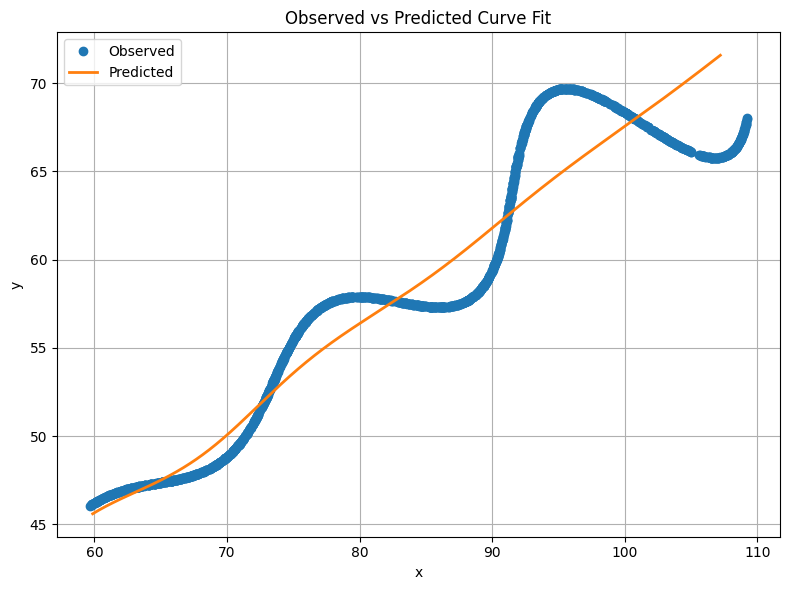

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(x_obs, y_obs, 'o', label='Observed')
plt.plot(x_pred, y_pred, '-', label='Predicted', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Observed vs Predicted Curve Fit")
plt.grid(True)
plt.tight_layout()
plt.savefig("fitted_curve.png", dpi=150)
plt.show()
